In [ ]:
! pip install sklearn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
import zipfile
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import defaultdict

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/heart_2020_cleaned.csv.zip"
#extracting the zipfile
with zipfile.ZipFile(path,'r') as zip_ref:
  zip_ref.extractall("/content/drive/MyDrive/Colab Notebooks")

In [4]:
#reading the dataframe
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
print("Size of the data: {}".format(data.size))
print("Shape of the data: {}".format(data.shape))

Size of the data: 5756310
Shape of the data: (319795, 18)


In [6]:
#variable information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [7]:
floats_var = data.select_dtypes(include = "float64")
print(floats_var.columns)
for column_name in floats_var.columns:
  print("Number of unique values of the {}: {}".format(column_name, data[column_name].nunique()))

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')
Number of unique values of the BMI: 3604
Number of unique values of the PhysicalHealth: 31
Number of unique values of the MentalHealth: 31
Number of unique values of the SleepTime: 24


In [8]:
#characteristics of the float variables
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


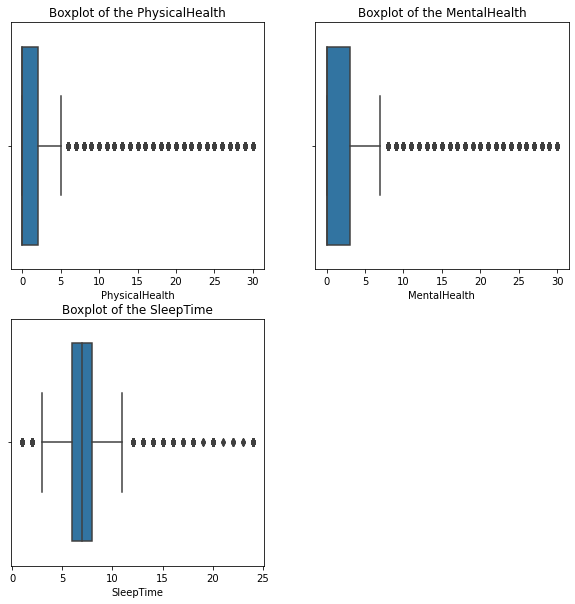

In [9]:
#box plots to identify outliers
#Physical health, mentla health and sleep time are kind of categorical here
col_names = ["PhysicalHealth","MentalHealth","SleepTime"]
plt.figure(figsize = (10,10))
for index,name in enumerate(col_names):
  plt.subplot(2,2, index+1)
  sns.boxplot(x = data[name])
  plt.title("Boxplot of the {}".format(name))
plt.show()
#These cannot be considered as outliers

In [10]:
#Looking for missing values
data.isnull().sum()
#No missing values

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [11]:
#Looking for duplicates
print("Number of duplicates: {}".format(data.duplicated().sum()))

Number of duplicates: 18078


In [12]:
#Removing duplicates
print("Number of rows before removing duplicates: {}".format(data.shape[0]))
data.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates: {}".format(data.shape[0]))

Number of rows before removing duplicates: 319795
Number of rows after removing duplicates: 301717


In [13]:
#resetting index
data.reset_index(drop = True, inplace = True)
print(data.shape)

(301717, 18)


### Data Analysis

In [14]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [15]:
for cols in data.columns:
  print("Number of unique values in {}: {}".format(cols, data[cols].nunique()))

Number of unique values in HeartDisease: 2
Number of unique values in BMI: 3604
Number of unique values in Smoking: 2
Number of unique values in AlcoholDrinking: 2
Number of unique values in Stroke: 2
Number of unique values in PhysicalHealth: 31
Number of unique values in MentalHealth: 31
Number of unique values in DiffWalking: 2
Number of unique values in Sex: 2
Number of unique values in AgeCategory: 13
Number of unique values in Race: 6
Number of unique values in Diabetic: 4
Number of unique values in PhysicalActivity: 2
Number of unique values in GenHealth: 5
Number of unique values in SleepTime: 24
Number of unique values in Asthma: 2
Number of unique values in KidneyDisease: 2
Number of unique values in SkinCancer: 2


In [16]:
def countplots(col_name,hue_name, figsize = (8,8)):
  #Countplots with hue values
  plt.figure(figsize = figsize)
  sns.countplot(x = data[col_name], hue = data[hue_name], palette=sns.color_palette("Paired"))
  plt.xlabel(f"{col_name}")
  plt.ylabel("Frequency")
  plt.title("Frequency distribution plot of the varaibel: {} with {}".format(col_name, hue_name))

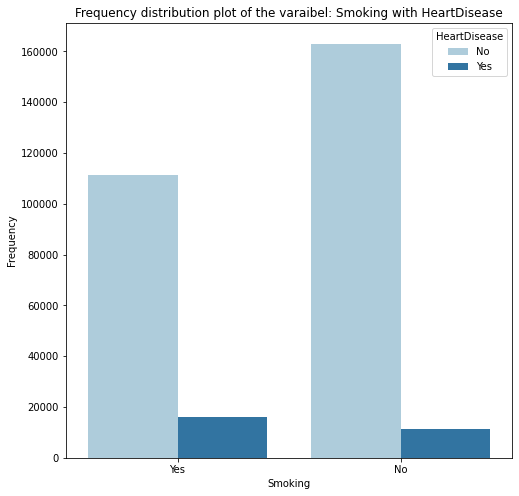

In [17]:
countplots('Smoking','HeartDisease')

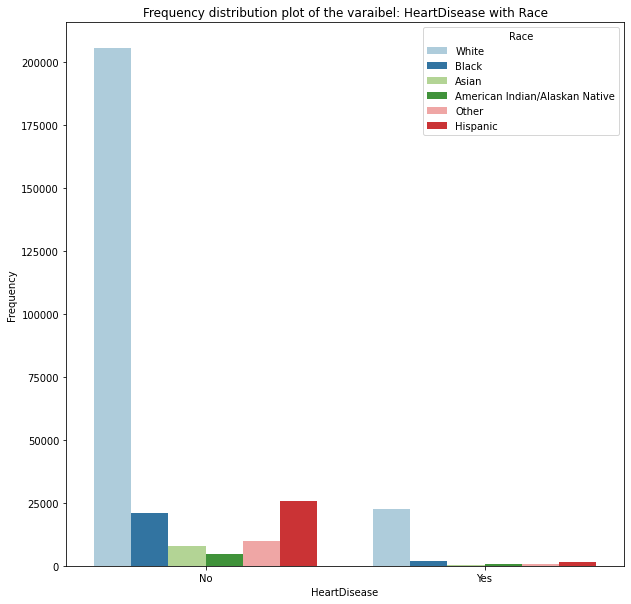

In [18]:
countplots("HeartDisease", "Race" ,figsize = (10,10))

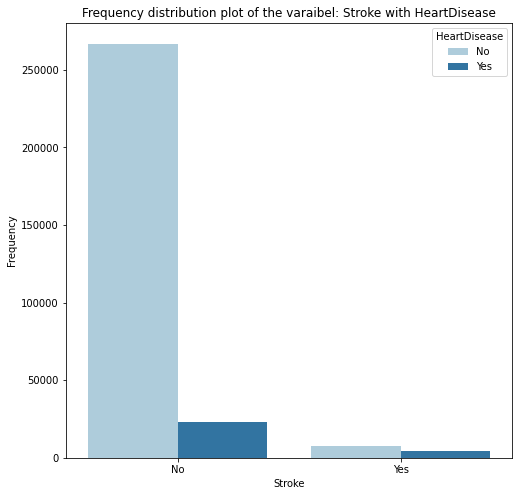

In [19]:
countplots('Stroke',"HeartDisease")

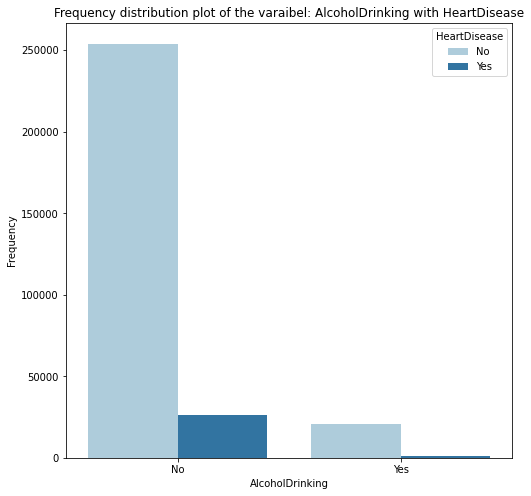

In [20]:
countplots('AlcoholDrinking',"HeartDisease")

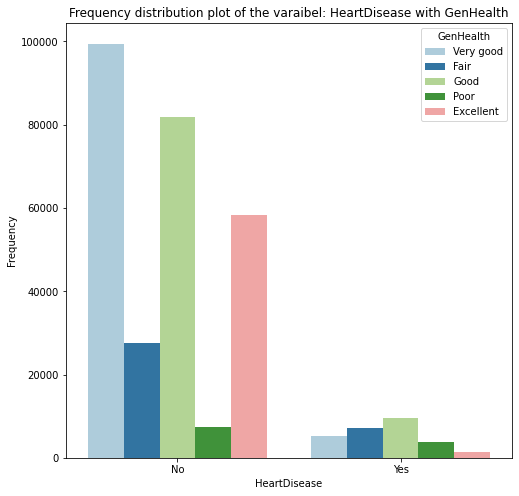

In [21]:
countplots("HeartDisease","GenHealth",)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of BMI with HeartDisease')

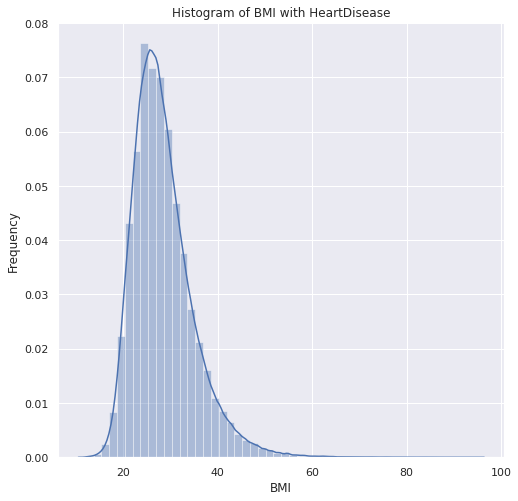

In [22]:
sns.set_theme()
plt.figure(figsize = (8,8))
sns.distplot(data['BMI'], kde = True)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title(f"Histogram of BMI with HeartDisease")

In [23]:
#viewinf the data
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


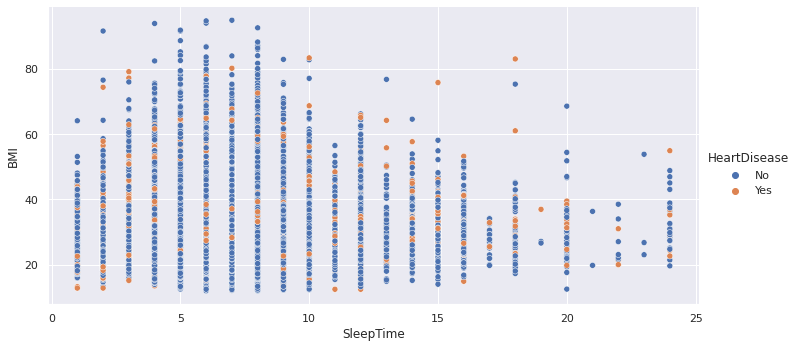

In [24]:
#comparing sleeptime and BMI with sleeptime
sns.relplot(data = data, x= 'SleepTime', y= 'BMI', hue = 'HeartDisease',aspect = 2)

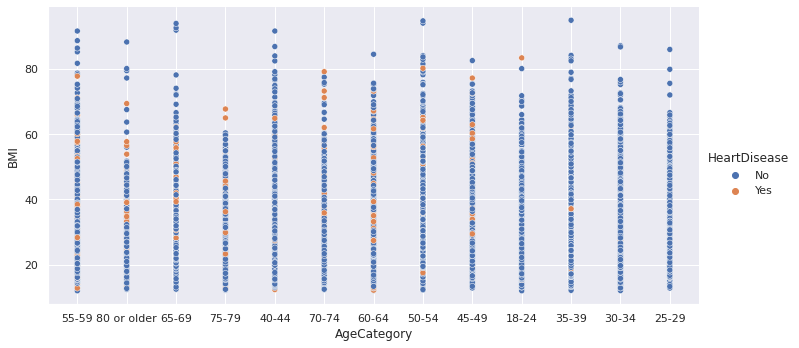

In [25]:
sns.relplot(data = data, x= 'AgeCategory', y= 'BMI', hue = 'HeartDisease',aspect = 2)

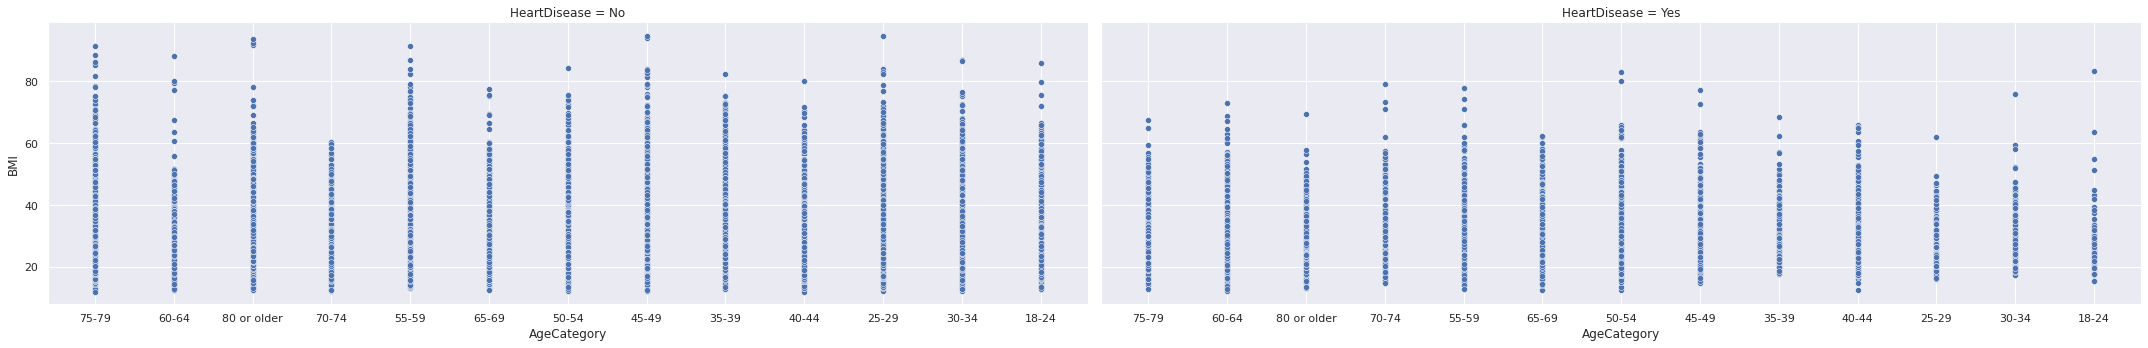

In [26]:
sns.relplot(data = data, x= 'AgeCategory', y= 'BMI', col = 'HeartDisease', aspect = 3, palette= 'pastel')

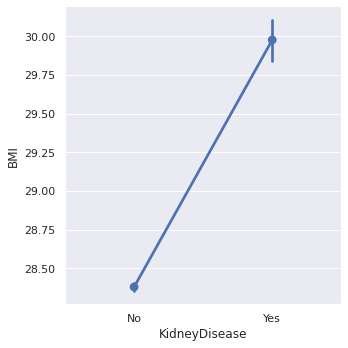

In [27]:
sns.catplot(data =data, x = "KidneyDisease", y = "BMI", kind = "point")

### Modeling

In [28]:
#encodng the dependent variable
lbl = LabelEncoder()
data['HeartDisease'] = lbl.fit_transform(data['HeartDisease'])

In [29]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [30]:
#creating dummies
cat_var = data.select_dtypes(include = 'object')
data1 = pd.get_dummies(data, columns = cat_var.columns, drop_first = True)

In [31]:
print("Shape of the data after creating dummies is: {}".format(data1.shape))

Shape of the data after creating dummies is: (301717, 38)


In [32]:
data1.head()

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16.60,3.0,30.0,5.0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,0,20.34,0.0,0.0,7.0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,26.58,20.0,30.0,8.0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,0,24.21,0.0,0.0,6.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,23.71,28.0,0.0,8.0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [33]:
#splitting data
X = data1.iloc[:,1:]
Y = data1.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [41]:
###Logistic regression

In [35]:
def classifier(algo_name, algo, x_train = x_train,x_test = x_test,y_train = y_train,y_test = y_test, preprocessing = False,dataframe = False):
  #making the dictionary global,sp can access outside
  global algo_details
  algo_details = defaultdict(list)
  if not preprocessing:
    #appending the algo_name
    algo_details['Algorithm'].append(algo_name)
    #calling the model object
    model = algo
    #training
    model.fit(x_train,y_train)
    #testing
    y_pred = model.predict(x_test)
    #Accuracy checking
    print("Training set accuracy: {}\n".format(accuracy_score(y_train, model.predict(x_train))))
    print("\ntesting set accuracy: {}\n".format(accuracy_score(y_pred,y_test)))
    algo_details['Testing Accuracy'].append(accuracy_score(y_pred,y_test))
    algo_details['Training Accuracy'].append(accuracy_score(y_train, model.predict(x_train)))
    #visualization
    print("\nVisualization\n")
    plt.figure(figsize = (6,6))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion matrix of the Testing Data")
    plt.show();
    #classification report
    print("\n")
    print(classification_report(y_pred,y_test))
  
  if preprocessing:
    #standardizing the data
    stc = StandardScaler()
    x_train_stc = stc.fit_transform(x_train)
    x_test_stc = stc.fit_transform(x_test)
    #appending the algo_name
    algo_details['Algorithm'].append(algo_name)
    #calling the model object
    model = algo
    #training
    model.fit(x_train_stc,y_train)
    #testing
    y_pred = model.predict(x_test_stc)
    #Accuracy checking
    print("Training set accuracy: {}\n".format(accuracy_score(y_train, model.predict(x_train_stc))))
    print("\ntesting set accuracy: {}\n".format(accuracy_score(y_pred,y_test)))
    algo_details['Testing Accuracy'].append(accuracy_score(y_pred,y_test))
    algo_details['Training Accuracy'].append(accuracy_score(y_train, model.predict(x_train_stc)))
    #visualization
    print("\nVisualization\n")
    plt.figure(figsize = (6,6))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, fmt = 'g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion matrix of the Testing Data")
    plt.show();
    #classification report
    print("\n")
    print(classification_report(y_pred,y_test))
  if dataframe:
    df = pd.DataFrame(algo_details)
    return df


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training set accuracy: 0.9110588176805193


testing set accuracy: 0.9108610632374387


Visualization



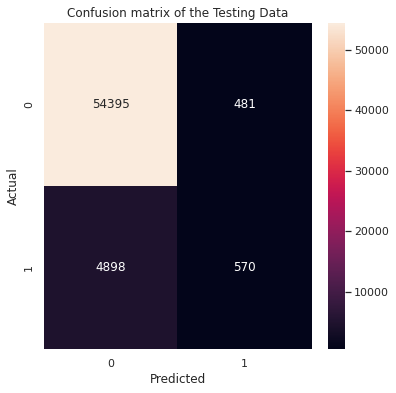



              precision    recall  f1-score   support

           0       0.99      0.92      0.95     59293
           1       0.10      0.54      0.17      1051

    accuracy                           0.91     60344
   macro avg       0.55      0.73      0.56     60344
weighted avg       0.98      0.91      0.94     60344



In [36]:
classifier("Logistic Regression", LogisticRegression())
#class imbalance problem is here

Training set accuracy: 0.911419255674827


testing set accuracy: 0.9110930664191966


Visualization



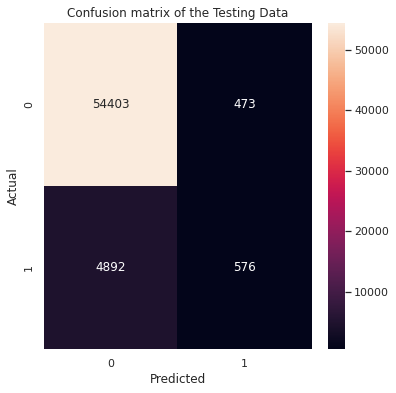



              precision    recall  f1-score   support

           0       0.99      0.92      0.95     59295
           1       0.11      0.55      0.18      1049

    accuracy                           0.91     60344
   macro avg       0.55      0.73      0.56     60344
weighted avg       0.98      0.91      0.94     60344



In [37]:
classifier("Logistic regression -standardize", LogisticRegression(), preprocessing=True)
#label 1, precisiona and recall is very low

In [42]:
#KNN

Training set accuracy: 0.9219382449569753


testing set accuracy: 0.8985151796367493


Visualization



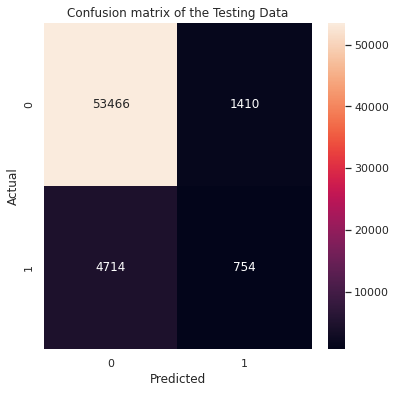



              precision    recall  f1-score   support

           0       0.97      0.92      0.95     58180
           1       0.14      0.35      0.20      2164

    accuracy                           0.90     60344
   macro avg       0.56      0.63      0.57     60344
weighted avg       0.94      0.90      0.92     60344



In [43]:
classifier("KNN", KNeighborsClassifier(n_neighbors=5), preprocessing= True)

In [45]:
stc1 = StandardScaler()
K = [i for i in range(1,21)]
MCE = []
for neighbors in K:
  kcl = KNeighborsClassifier(n_neighbors = neighbors)
  kcl.fit(stc1.fit_transform(x_train),y_train)
  y_pred = kcl.predict(stc1.fit_transform(x_test))
  MCE.append(1 - accuracy_score(y_pred,y_test))

plt.figure(figsize = (8,8))
plt.plot(K,MCE,'*', c = 'red')
plt.xlabel("Neighbors")
plt.ylabel("Mean Classification Error")
plt.title("Mean classification error comparison with number of neighbors")
